In [4]:
#All necessary imports and their dependencies
import numpy as np
import os
import pytraj as pt
import mdtraj as mdt
from pathlib import Path
import pandas as pd
import json
from pytraj import matrix
import matplotlib.pyplot as plt

#Plot parameters set at the top for all figures
#plt.rc('legend',fontsize=12)
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.gcf().savefig("test.png",dpi=300)
plt.rc('legend',fontsize=12)
path=Path(os.getcwd())
print(path)
parent=path.parent.absolute()
print(parent)

/Users/alecloftus/Analyses
/Users/alecloftus


<Figure size 640x480 with 0 Axes>

/Users/alecloftus/Desktop/Analyses/WT_ABLIM1
['abm_ProtIon_trip1.xtc', 'abm_ProtIon_trip2.xtc', 'abm_ProtIon_trip3.xtc']
['abm_ProtIon_trip1_start.pdb', 'abm_ProtIon_trip2_start.pdb', 'abm_ProtIon_trip3_start.pdb']


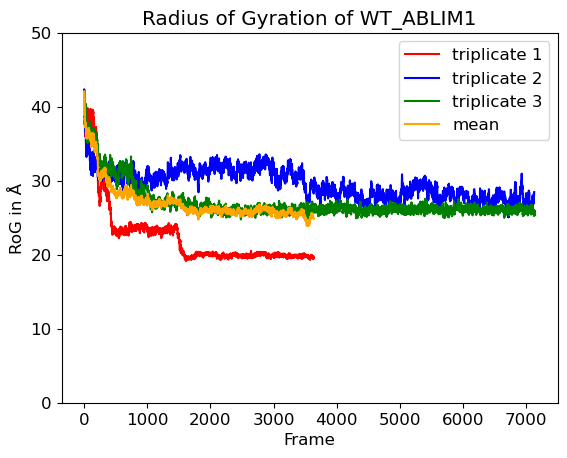

In [3]:
#RADIUS OF GYRATION (RoG) of each replicate for a system

#Declare the system(s) you want to find the RoG for
system='WT_ABLIM1'
#systems=['WT_ABLIM1','S216_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']

#use template to produce the trajectory and topology file names
template= 'abm_ProtIon_trip%s'
trajectory= [template % (str(i)+'.xtc') for i in range (1,4)]
#print(trajectory)

topology= [template % (str(i)+'_start.pdb') for i in range (1,4)]
#print(topology)

os.chdir(path/system)
print(os.getcwd())

print(trajectory)
print(topology)

#Trajectory files loaded for each replicate. Modify this for different # of replicates
traj1=pt.iterload(trajectory[0],topology[0])
traj2=pt.iterload(trajectory[1],topology[1])
traj3=pt.iterload(trajectory[2],topology[2])

#pytraj radius of gyration calculated for the backbone atoms
data1=pt.radgyr(traj1, mask='@BB')
data2=pt.radgyr(traj2, mask='@BB')
data3=pt.radgyr(traj3, mask='@BB')

#PLOT ROG


#longest=max(len(data1),len(data2),len(data3))
#Turn the lists of RoG for each replicate into arrays
multiple_lists = [data1,data2,data3]
arrays = [np.array(x) for x in multiple_lists]
means=[np.mean(k) for k in zip(*arrays)]

fig,ax = plt.subplots()
#fig=plt.figure(figsize=(14,5))
x1=np.arange(0,len(data1))
x2=np.arange(0,len(data2))
x3=np.arange(0,len(data3))
x4=np.arange(0,len(means))
y1=np.array(data1)
y2=np.array(data2)
y3=np.array(data3)
y4=np.array(means)
ax=plt.gca()
ax.set_ylim(0.0,50.0)
ax.plot(x1,y1,linestyle='-',color='red',label='triplicate 1')
ax.plot(x2,y2,linestyle='-',color='blue',label='triplicate 2')
ax.plot(x3,y3,linestyle='-',color='green',label='triplicate 3')
#Calculate the mean RoG in addition to the RoG for each replicate
ax.plot(x4,y4,linestyle='-',color='orange',label='mean')
title="Radius of Gyration of " + system
leg=ax.legend()
plt.title(title)
plt.xlabel("Frame")
plt.ylabel("RoG in Å")
 
name=system+'_ROG.png'
#plt.savefig(name)
plt.show()

In [3]:
#DICTIONARIES OF ZN ATOMS & THEIR CONSTRAINED CG SIDE CHAINS
WT_ABLIM1_constraints= {'@571':['@8','@17','@58','@65'],'@572':['@73','@80','@119','@125'],
                        '@573':['@150','@157','@195','@201'],'@574':['@208','@214','@258','@264'],
                        '@575':['@300','@304','@345','@350'],'@576':['@359','@366','@404','@411'],
                        '@577':['@433','@438','@482','@488'],'@578':['@494','@501','@548','@554']
}
S216D_ABLIM1_constraints={'@576':['@8','@17','@58','@65'],'@577':['@73','@80','@119','@125'],
                        '@578':['@150','@157','@195','@201'],'@579':['@208','@214','@258','@264'],
                        '@580':['@300','@304','@345','@350'],'@581':['@359','@366','@404','@411'],
                        '@582':['@433','@438','@482','@488'],'@583':['@494','@501','@548','@554']
}
LIM2_WT_ABLIM1_constraints={'@140':['@7','@14','@52','@58'],'@141':['@65','@71','@115','@121']
}
ABLIM2_constraints={'@179':['@40','@48','@87','@93'],'@180':['@101','@106','@149','@156']
}
S76D_ABLIM2_constraints={'@179':['@40','@48','@87','@93'],'@180':['@101','@106','@149','@156']
}
if system=='WT_ABLIM1':
    constraints=WT_ABLIM1_constraints
elif system=='S216D_ABLIM1':
    constraints=S216D_ABLIM1_constraints
elif system=='LIM2_WT_ABLIM1':
    constraints=LIM2_WT_ABLIM1_constraints
else:
    constraints=ABLIM2_constraints

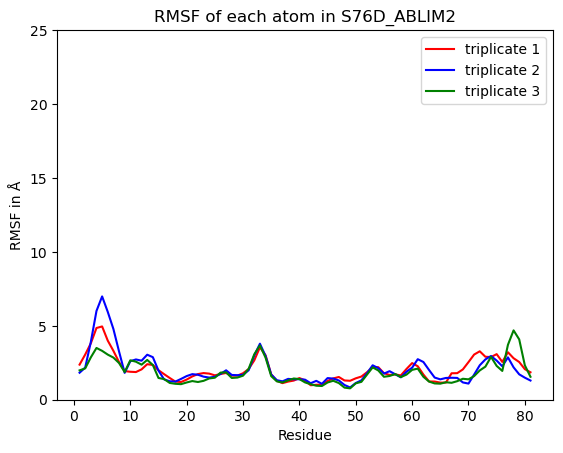

In [252]:
#RMSF 
#superimpose the structure onto its first frame
traj1_imposed= pt.superpose(traj1,ref=0)
#Calculate the RMSF for the bb beads of the replicate
rmsf_data1=pt.rmsf(traj1_imposed,mask='@BB',options='byres')
#print(rmsf_data1)

traj2_imposed= pt.superpose(traj2,ref=0)
rmsf_data2=pt.rmsf(traj2_imposed,mask='@BB',options='byres')
#print(rmsf_data2)

traj3_imposed= pt.superpose(traj3,ref=0)
rmsf_data3=pt.rmsf(traj3_imposed,mask='@BB',options='byres')
#print(rmsf_data3)

#ZN ion atom numbers in each system
if system=='WT_ABLIM1':
    zn1=573
    zn2=574
    zns='@573 @574'
elif system=='S216D_ABLIM1':
    zn1=578
    zn2=579
    zns=':252 :253'
elif system=='LIM2_WT_ABLIM1':
    zn1=140
    zn2=141
    zns=':64 :65'
else:
    zn1=179
    zn2=180
    zns=':82 :83'



fig,ax = plt.subplots()
ax=plt.gca()
ax.set_ylim(0.0,25.0)
ax.plot(rmsf_data1.T[0],rmsf_data1.T[1],linestyle='-',color='red',label='triplicate 1')
ax.plot(rmsf_data2.T[0],rmsf_data2.T[1],linestyle='-',color='blue',label='triplicate 2')
ax.plot(rmsf_data3.T[0],rmsf_data3.T[1],linestyle='-',color='green',label='triplicate 3')

'''for value in constraints.values():
    for i in range(0,4):
        atom=int(value[i][1:])
        print(atom)
        plt.axvspan(atom,atom+1, color='gray',alpha=1.0)
    

plt.axvspan(8,9, color='gray',alpha=1.0)
plt.axvspan(17,46, color='gray',alpha=1.0,label='ZN176 constrained')
plt.axvspan(81,82, color='gray',alpha=1.0)
plt.axvspan(89,90, color='red',alpha=1.0)
plt.axvspan(97,98, color='green',alpha=1.0,label='ZN177 constrained')
plt.axvspan(102,103, color='green',alpha=1.0)
plt.axvspan(145,146, color='green',alpha=1.0)
plt.axvspan(152,153, color='green',alpha=1.0)
plt.axvspan(176,176, color='red',alpha=1.0)
plt.axvspan(177,177, color='green',alpha=1.0)
'''
leg = ax.legend()
title= 'RMSF of each residue in ' + system
plt.title(title)
plt.xlabel('Residue')
plt.ylabel('RMSF in Å')

name=system+'_RMSF.png'
plt.savefig(name)
plt.show()

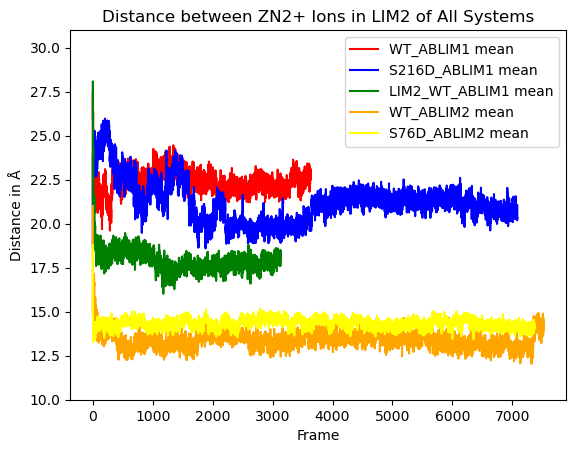

In [266]:
#DISTANCES BETWEEN LIM2 ZNs


fig,ax = plt.subplots()
title="Mean Distance between ZN2+ Ions in LIM2 of All Systems"
plt.title(title)
plt.xlabel("Frame")
plt.ylabel("Distance in Å")
#WT_ABLIM1 is res 250 & 251
#S216D_ABLIM1 is res 252 & 253
#LIM2_WT_ABLIM1 is res 64 & 65
#WT_ABLIM2 is 82 & 83
#S76D_ABLIM2 is 82 & 83
systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['red','blue','green','orange','yellow']
for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        zn1=573
        zn2=574
        zns='@573 @574'
    elif system=='S216D_ABLIM1':
        zn1=578
        zn2=579
        zns=':252 :253'
    elif system=='LIM2_WT_ABLIM1':
        zn1=140
        zn2=141
        zns=':64 :65'
    else:
        zn1=179
        zn2=180
        zns=':82 :83'
    
    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    ZN_distances1=pt.distance(traj1, mask=zns)
    ZN_distances2=pt.distance(traj2, mask=zns)
    ZN_distances3=pt.distance(traj3, mask=zns)

    #take each replicate distance in a system in a list
    multiple_lists = [ZN_distances1,ZN_distances2,ZN_distances3]
    #convert list to array
    arrays = [np.array(x) for x in multiple_lists]
    #calculate mean of all replicates' ZN distances to find the system's mean ZN distance
    means=[np.mean(k) for k in zip(*arrays)]
    
    #print(means)
    
    
    x1=np.arange(0,len(ZN_distances1))
    x2=np.arange(0,len(ZN_distances2))
    x3=np.arange(0,len(ZN_distances3))
    x4=np.arange(0,len(means))
    y1=np.array(ZN_distances1)
    y2=np.array(ZN_distances2)
    y3=np.array(ZN_distances3)
    y4=np.array(means)
    #ax=plt.gca()
    ax.set_ylim(10.0,31.0)
    #ax.plot(x1,y1,linestyle='-',color='red',label='triplicate 1',zorder=1)
    #ax.plot(x2,y2,linestyle='-',color='blue',label='triplicate 2',zorder=2)
    #ax.plot(x3,y3,linestyle='-',color='green',label='triplicate 3',zorder=3)
    legend=system+' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()



os.chdir(path)
name='Mean_LIM2_ZN_distances.png'
plt.savefig(name)
plt.show()

In [193]:
#Distances between ZN ions & Constrained Residues

'''
WT_ABLIM1_constraints= {'@571':['@8','@17','@58','@65'],'@572':['@73','@80','@119','@125'],
                        '@573':['@150','@157','@195','@201'],'@574':['@208','@214','@258','@264'],
                        '@575':['@300','@304','@345','@350'],'@576':['@359','@366','@404','@411'],
                        '@577':['@433','@438','@482','@488'],'@578':['@494','@501','@548','@554']
                       }
#mask for ZN & all other CYS or HIS
#for each ZN, pull out everything within 

#explicitly define for the 2 ZNs in LIM2 (ABLIM1 & ABLIM2)

#RDF for each ZN in sequence - ask Xuan about it for O/Ca+


print(system)
#distance_matrix=[]
for key, value in constraints.items():
    for i in range(0,4):
        #print(type(combo))
        zinc=key
        atom=value[i]
        pair=atom + ' ' + zinc
        print(pair)
        distance_matrix.append(pt.distance(traj1,pair))
        distance_matrix.append(pt.distance(traj2,pair))
        distance_matrix.append(pt.distance(traj3,pair))
print(len(distance_matrix))


print(distance_matrix[0])
print(len(distance_matrix))

#def Distances(key,value,trajectory):
#    distances=pt.distance(trajectory,

#I have 96 arrays in a matrix, properly ordered, im having difficulty 
#figuring out how i should plot them/plot them separately


def WT_ABLIM1(traj1,traj2,traj3):

    CYS99ZN1 = '@8 @571' 
    Cys18Zn82=pt.distance(traj1,'@8 @571')
    Cys18Zn82=pt.distance(traj2,':18@SC1 @571')
    Cys18Zn82=pt.distance(traj3,':18@SC1 @571')

    CYS102ZN1= '@17 @571'
    HIS119ZN1= '@58 @571'
    CYS122ZN1='@65 @571'

    CYS125ZN2='@73 @572'
    CYS128ZN2='@80 @572'
    CYS146ZN2='@119 @572'
    ASP149ZN2='@125 @572

    CYS158ZN3='@150 @573'
    CYS161ZN3='@157 @573'
    HIS178ZN3='@195 @573'
    CYS181ZN3='@201 @573'

    CYS184ZN4='@208 @574'
    CYS187ZN4='@214 @574'
    CYS
    

def S216D_ABLIM1(traj1,traj2,traj3):


def LIM2_WT_ABLIM1(traj1,traj2,traj3):


def WT_ABLIM2(traj1,traj2,traj3):



def S76D_ABLIM2(traj1,traj2,traj3):




if system=='WT_ABLIM1':
    WT_ABLIM1(traj1,traj2,traj3)
elif system=='S216D_ABLIM1':
    S216D_ABLIM1(traj1,traj2,traj3)
elif system=='LIM2_WT_ABLIM1':
    LIM2_WT_ABLIM1(traj1,traj2,traj3)
elif system=='WT_ABLIM2':
    WT_ABLIM2(traj1,traj2,traj3)
elif system=='S76D_ABLIM2':
    S76D_ABLIM2(traj1,traj2,traj3)




ZN_distances1=pt.distance(traj1, mask=zns)
ZN_distances2=pt.distance(traj2, mask=zns)
ZN_distances3=pt.distance(traj3, mask=zns)
'''

[7.08486872 9.07496483 7.52168944 ... 7.77962777 7.5249172  6.92200106]
96


"\ndef WT_ABLIM1(traj1,traj2,traj3):\n\n    CYS99ZN1 = '@8 @571' \n    Cys18Zn82=pt.distance(traj1,'@8 @571')\n    Cys18Zn82=pt.distance(traj2,':18@SC1 @571')\n    Cys18Zn82=pt.distance(traj3,':18@SC1 @571')\n\n    CYS102ZN1= '@17 @571'\n    HIS119ZN1= '@58 @571'\n    CYS122ZN1='@65 @571'\n\n    CYS125ZN2='@73 @572'\n    CYS128ZN2='@80 @572'\n    CYS146ZN2='@119 @572'\n    ASP149ZN2='@125 @572\n\n    CYS158ZN3='@150 @573'\n    CYS161ZN3='@157 @573'\n    HIS178ZN3='@195 @573'\n    CYS181ZN3='@201 @573'\n\n    CYS184ZN4='@208 @574'\n    CYS187ZN4='@214 @574'\n    CYS\n    \n\ndef S216D_ABLIM1(traj1,traj2,traj3):\n\n\ndef LIM2_WT_ABLIM1(traj1,traj2,traj3):\n\n\ndef WT_ABLIM2(traj1,traj2,traj3):\n\n\n\ndef S76D_ABLIM2(traj1,traj2,traj3):\n\n\n\n\nif system=='WT_ABLIM1':\n    WT_ABLIM1(traj1,traj2,traj3)\nelif system=='S216D_ABLIM1':\n    S216D_ABLIM1(traj1,traj2,traj3)\nelif system=='LIM2_WT_ABLIM1':\n    LIM2_WT_ABLIM1(traj1,traj2,traj3)\nelif system=='WT_ABLIM2':\n    WT_ABLIM2(traj1,tra

['abm_water_trip1.xtc', 'abm_water_trip2.xtc', 'abm_water_trip3.xtc']
['abm_water_trip1_start.pdb', 'abm_water_trip2_start.pdb', 'abm_water_trip3_start.pdb']


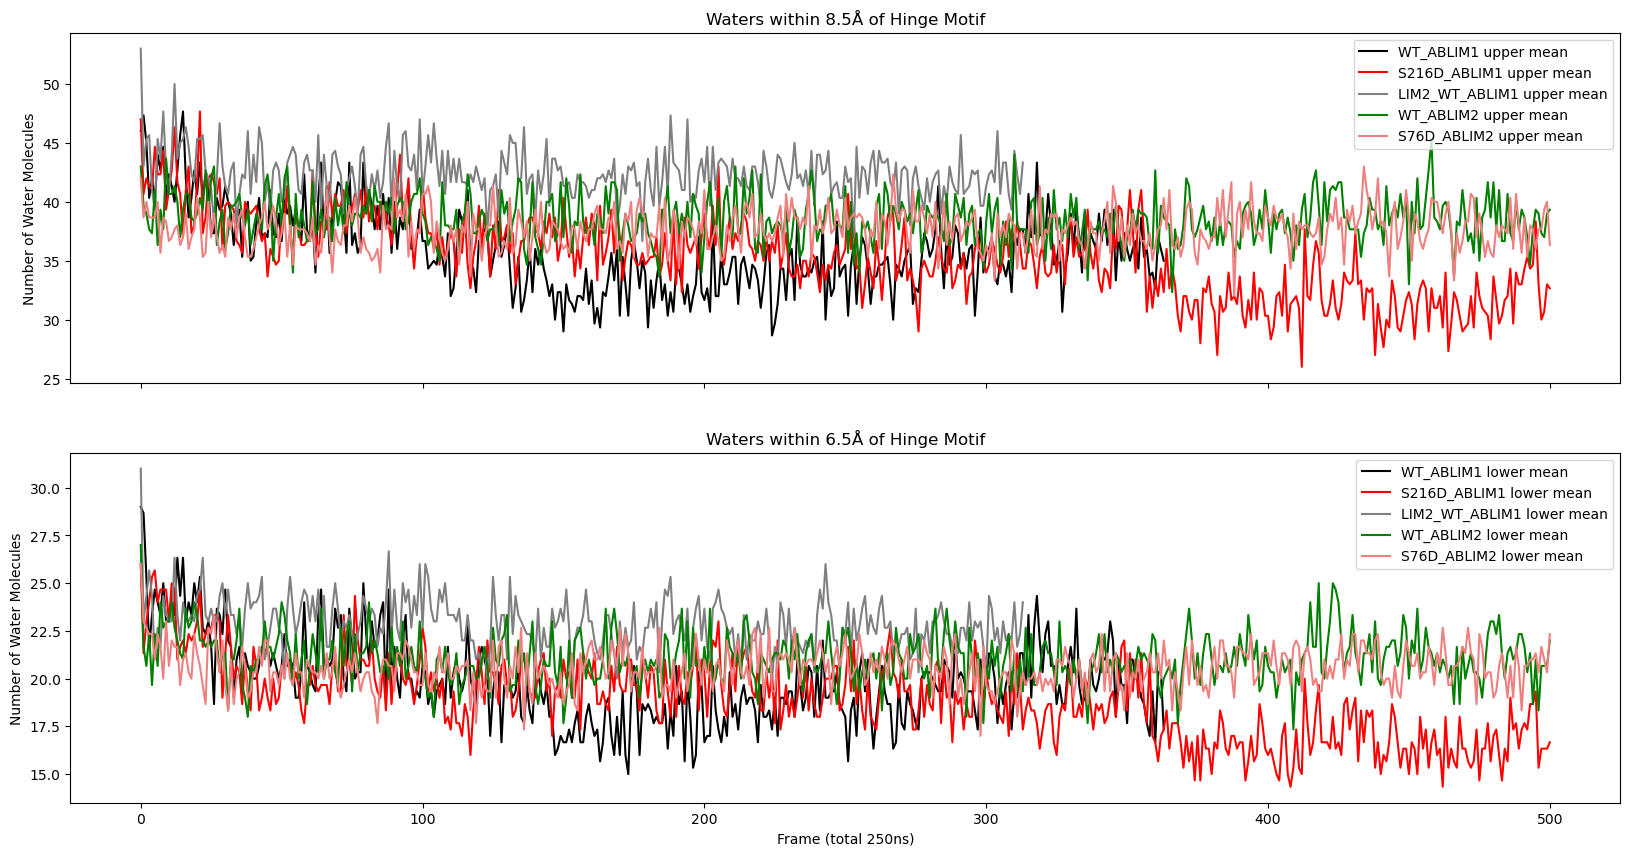

In [143]:
#Water shell MSSSP motif


lower_bar_means=[]
lower_bar_sds=[]
upper_bar_means=[]
upper_bar_sds=[]

#Different traj & top files for analysis that include the solution
water_template= 'abm_water_trip%s'
water_trajectory= [water_template % (str(i)+'.xtc') for i in range (1,4)]

water_topology= [water_template % (str(i)+'_start.pdb') for i in range (1,4)]

print(water_trajectory)
print(water_topology)

systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['black','red','gray','green','lightcoral']


fig,(ax1,ax2) = plt.subplots(nrows=2,sharex=True)

ax1.figure.set_size_inches(20.0,15.0)
ax2.figure.set_size_inches(20.0,10.0)
#fig=plt.figure(figsize=(25,10))
#title="Mean Watershell Distances of All Systems"
#plt.title(title)
#plt.xlabel("Frame")
#plt.ylabel("Distance in Å")
for system in systems:
    os.chdir(path/system)
    #mask of the system is the MSSSP motif residues of the system / MSSDP motif for phosphorylated system
    if system=='WT_ABLIM1':
        mask=':117-121'
    elif system=='S216D_ABLIM1':
        mask=':117-121'
    elif system=='LIM2_WT_ABLIM1':
        mask=':58-62'
    else:
        mask=':73-77'
    
    sys_mean=system + ' mean'
    
    traj1=pt.iterload(water_trajectory[0],water_topology[0])
    traj2=pt.iterload(water_trajectory[1],water_topology[1])
    traj3=pt.iterload(water_trajectory[2],water_topology[2])
    #print(traj1)
    #print(traj2)
    #print(traj3)
    #set angstrom limits for finding # of water beads within the space
    lower_limit=6.5
    upper_limit=8.5
    data1=pt.watershell(traj1, solute_mask=mask,solvent_mask='@WN',lower=lower_limit,upper=upper_limit)
    data2=pt.watershell(traj2, solute_mask=mask,solvent_mask='@WN',lower=lower_limit,upper=upper_limit)
    data3=pt.watershell(traj3, solute_mask=mask,solvent_mask='@WN',lower=lower_limit,upper=upper_limit)
    #print(data1[0])
    #print(data2)
    #print(data3)
    lowers_list=[data1[0],data2[0],data3[0]]
    uppers_list=[data1[1],data2[1],data3[1]]
    
    #mean of lower limit mean/sd
    lower_arrays = [np.array(x) for x in lowers_list]
    lower_means=[np.mean(k) for k in zip(*lower_arrays)]
    lower_sds=[np.std(k) for k in zip(*lower_arrays)]
    #print(lower_means)
    #print(lower_sds)
    #mean of upper limit mean/sd
    upper_arrays = [np.array(x) for x in uppers_list]
    upper_means=[np.mean(k) for k in zip(*upper_arrays)]
    upper_sds=[np.std(k) for k in zip(*upper_arrays)]
    #print(upper_means)
    #print(upper_sds)

    #first 200 frames less representative of whole system progression over 2 microseconds, so cut them out
    lower_bar_means.append(np.mean(lower_means[200:]))
    lower_bar_sds.append(np.std(lower_sds[200:]))
    upper_bar_means.append(np.mean(upper_means[200:]))
    upper_bar_sds.append(np.std(upper_sds[200:]))
    
    x1=np.arange(0,len(lower_means))
    x2=np.arange(0,len(upper_means))
    y1=np.array(lower_means)
    y2=np.array(upper_means)
    e1=np.array(lower_sds)
    e2=np.array(upper_sds)
    #ax.set_ylim(0.0,40.0)
    

    lower_legend=system+' lower mean'
    upper_legend=system+' upper mean'
    ax1.plot(x2,y2,linestyle='-',color=colors[color_num],label=upper_legend)
    ax2.plot(x1,y1,linestyle='-',color=colors[color_num],label=lower_legend)

    ax1.set_title('Waters within ' + str(upper_limit) + 'Å of Hinge Motif')
    ax1.set_ylabel('Number of Water Molecules')
    
    ax2.set_title('Waters within ' + str(lower_limit) + 'Å of Hinge Motif')
    ax2.set_ylabel('Number of Water Molecules')
    
    
    color_num+=1
    leg = ax1.legend()
    end=ax2.legend()
    
    #mean of 

plt.xlabel("Frame (total 250ns)")
os.chdir(path)
name='Mean_Watershell_Atoms.png'
plt.savefig(name)
plt.show()

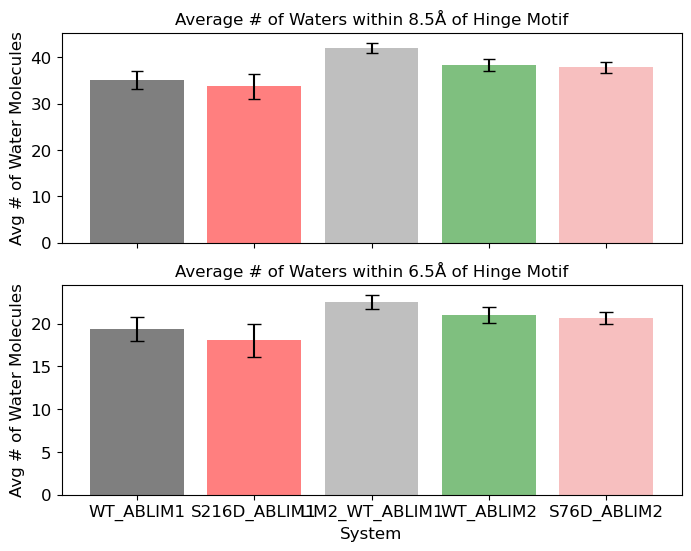

In [245]:
#BAR PLOT OF MEAN/SD OF WATER MOTIFS
#data from previous cell turned into bar graphs

#print(lower_bar_means)
#print(len(lower_bar_means))
#print(lower_bar_sds)
#print(upper_bar_means)
#print(upper_bar_sds)
systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
colors=['black','red','gray','green','lightcoral']

fig,(ax1,ax2) = plt.subplots(nrows=2,sharex=True)

    
ax1.figure.set_size_inches(8.0,8.0)
ax2.figure.set_size_inches(8.0,6.0)
x1=np.array(systems)
x2=np.array(systems)
y1=np.array(lower_bar_means)
y2=np.array(upper_bar_means)
e1=np.array(lower_bar_sds)
e2=np.array(upper_bar_sds)
    #ax.set_ylim(0.0,40.0)
    
lower_legend=system+' lower mean'
upper_legend=system+' upper mean'
ax1.bar(x2,y2,yerr=e2, align='center',alpha=0.5,color=colors,capsize=4)
ax2.bar(x1,y1,yerr=e1, align='center',alpha=0.5,color=colors,capsize=5)

ax1.set_title('Average # of Waters within ' + str(upper_limit) + 'Å of Hinge Motif',size=12.0)
ax1.set_ylabel('Avg # of Water Molecules')

ax2.set_title('Average # of Waters within ' + str(lower_limit) + 'Å of Hinge Motif',size=12.0)
ax2.set_ylabel('Avg # of Water Molecules')
ax2.set_xlabel('System',size=12.0)

os.chdir(path)
name='Average_Waters.png'
plt.gcf().savefig(name,dpi=300)
plt.show()

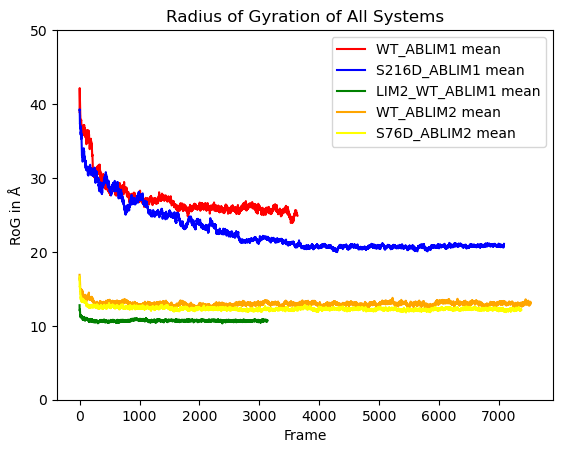

In [254]:
#MEAN ROG

systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['red','blue','green','orange','yellow']
fig,ax = plt.subplots()
for system in systems:
    os.chdir(path/system)
    sys_mean=system + ' mean'
    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])


    data1=pt.radgyr(traj1, mask='@BB')
    data2=pt.radgyr(traj2, mask='@BB')
    data3=pt.radgyr(traj3, mask='@BB')

    multiple_lists = [data1,data2,data3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]

    
    #fig=plt.figure(figsize=(14,5))
    x=np.arange(0,len(means))
    y=np.array(means)
    #ax=plt.gca()
    ax.set_ylim(0.0,50.0)
    ax.plot(x,y,linestyle='-',color=colors[color_num],label=sys_mean)
    color_num+=1
    title="Radius of Gyration of All Systems"
    leg=ax.legend()
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("RoG in Å")

os.chdir(path)
name='ROG_means.png'
#plt.savefig(name)
plt.show()
    

[32.34980765000554, 31.940820437764113, 31.860354115339874, 31.345840374377577, 31.607252531667417, 31.257164478763325, 31.261951145756598, 31.75651332931316, 31.70322727188351, 31.6478030630099, 31.31422476217084, 31.253225851642203, 31.371247176480594, 31.092813016936475, 31.249540195083267, 31.167286985391986, 31.256290061030644, 31.165990159669136, 31.54836738953382, 31.49950599686876, 31.008010742292985, 31.127864815374224, 31.072439322358424, 31.515591832173218, 31.29362784228414, 31.399336219335805, 31.329756532602584, 31.379384250337694, 31.222780612434736, 31.12899934376091, 31.222570130221698, 31.17910027149813, 31.473916232122832, 31.15926729149957, 31.494955141631532, 31.437219659988752, 31.169118098570948, 30.939029188172057, 30.79156159692693, 30.396585628466365, 30.734876711241753, 30.881931556661247, 30.940310330678987, 31.178009524207457, 31.006721703696204, 30.66300368652082, 30.545631011036065, 30.324361870920665, 30.43981308086913, 30.71858774551475, 30.839690509379

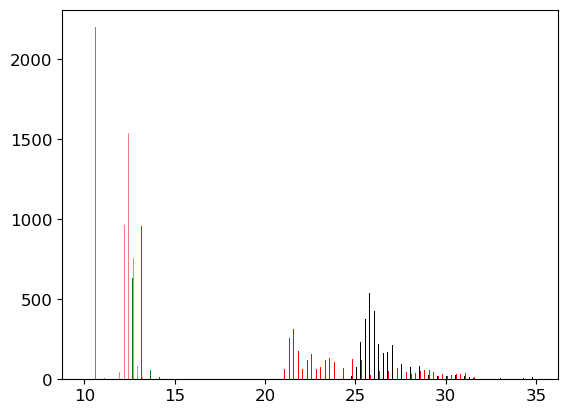

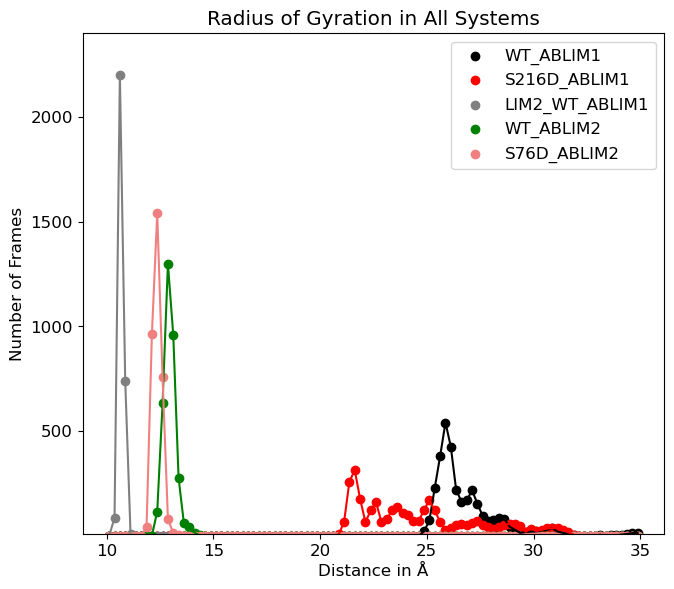

In [284]:
#HISTOGRAM OF MEAN ROG OF ALL SYSTEMS

x_multi=[]
systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
n_bins=100
color_num=0
colors=['black','red','gray','green','lightcoral']
fig,ax = plt.subplots()
for system in systems:
    os.chdir(path/system)
    sys_mean=system + ' mean'
    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])


    data1=pt.radgyr(traj1, mask='@BB')
    data2=pt.radgyr(traj2, mask='@BB')
    data3=pt.radgyr(traj3, mask='@BB')

    multiple_lists = [data1,data2,data3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    #print(means)
    #print(len(means))
    x_multi.append(means[100:3500])
    
    #legend=system+ ' mean'

#calculate the bars & edges of the histogram
bin_counts,bin_edges,bars=ax.hist(x_multi, n_bins, histtype='bar',range=(10,35),color=colors,label=systems)


fig,ax = plt.subplots()
for i in range(len(bin_counts)):
    #generate the outline/shape of the histogram for each system, NOT including the bars themselves
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(x=bin_centres,y=bin_counts[i],color=colors[i],label=systems[i])
    plt.plot(bin_centres,bin_counts[i],color=colors[i])


'''for i in range(len(x_multi)):
    histo, bin_edges = np.histogram(x_multi[i],nbins)
    bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.plot(bin_center,histo,color=colors[i])
    ax.scatter(x=bin_center,y=histo,color=colors[i],label=systems[i])
#plt.show()
'''
title="Radius of Gyration in All Systems"
plt.title(title)
plt.ylim(10,2400)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
ax.figure.set_size_inches(7.5,6.5)
ax.legend()
#for b in bars:
#    ax.bar_label(b, labels=[v.astype(np.int64) if v > 0 else '' for v in b.datavalues])

name='ALL_ROG_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()


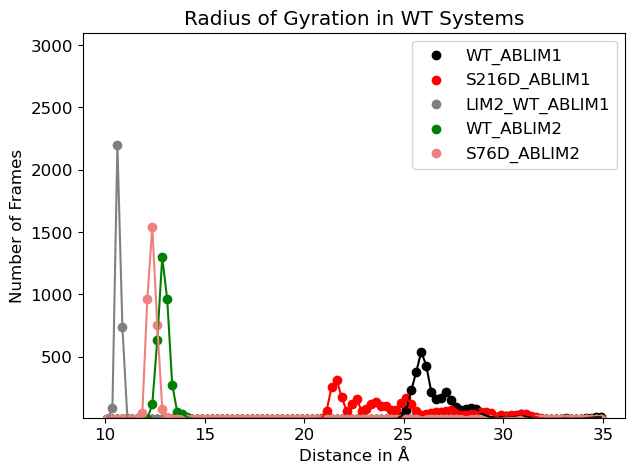

In [260]:
#Figure generation (same as above but isolated from data collection and with different ylim parameters & fig size
fig,ax = plt.subplots()
for i in range(len(bin_counts)):
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(x=bin_centres,y=bin_counts[i],color=colors[i],label=systems[i])
    plt.plot(bin_centres,bin_counts[i],color=colors[i])

plt.ylim(10,3100)
title="Radius of Gyration in All Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
ax.figure.set_size_inches(7,5)
ax.legend()

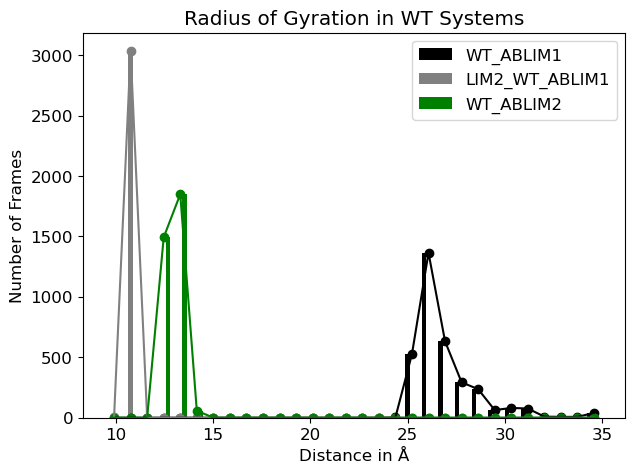

In [282]:
#ROG OF WT SYSTEMS

x_multi=[]
#Only using WT systems, no phosphorylation yet
systems=['WT_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2']
#n_bins=30
color_num=0
colors=['black','gray','green']
fig,ax = plt.subplots()
for system in systems:
    os.chdir(path/system)
    sys_mean=system + ' mean'
    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])


    data1=pt.radgyr(traj1, mask='@BB')
    data2=pt.radgyr(traj2, mask='@BB')
    data3=pt.radgyr(traj3, mask='@BB')

    multiple_lists = [data1,data2,data3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    #print(means)
    #print(len(means))
    x_multi.append(means[100:3500])
    
    #legend=system+ ' mean'

nbins=30
bin_counts,bin_edges,bars=ax.hist(x_multi, nbins,histtype='bar',range=(9.5,35),color=colors,label=systems)
#bin_counts,bin_edges=np.histogram(x_multi[0], nbins)


'''
for i in range(len(x_multi)):
    histo, bin_edges = np.histogram(x_multi[i],nbins)
    bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.plot(bin_center,histo,color=colors[i])
    ax.scatter(x=bin_center,y=histo,color=colors[i],label=systems[i])
#plt.show()
'''


for i in range(len(bin_counts)):
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(x=bin_centres,y=bin_counts[i],color=colors[i])
    plt.plot(bin_centres,bin_counts[i],color=colors[i])
#plt.errorbar(x=bin_centres, y=bin_counts, yerr=err, fmt='o')

title="Radius of Gyration in WT Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
ax.figure.set_size_inches(7,5)
ax.legend()
#for b in bars:
#    ax.bar_label(b, labels=[v.astype(np.int64) if v > 0 else '' for v in b.datavalues])

name='WT_ROG_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

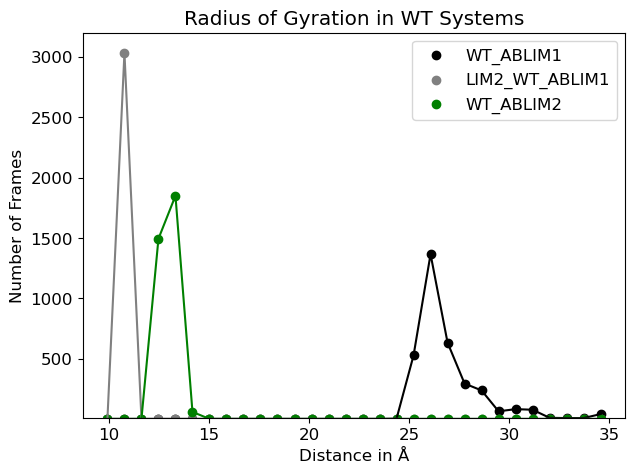

In [264]:
#RoG for WT Systems figure generation, without bars
fig,ax = plt.subplots()
for i in range(len(bin_counts)):
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(x=bin_centres,y=bin_counts[i],color=colors[i],label=systems[i])
    plt.plot(bin_centres,bin_counts[i],color=colors[i])

title="Radius of Gyration in WT Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
ax.figure.set_size_inches(7,5)
ax.legend()
#for b in bars:
#    ax.bar_label(b, labels=[v.astype(np.int64) if v > 0 else '' for v in b.datavalues])
plt.ylim(10,3200)

name='WT_ROG_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

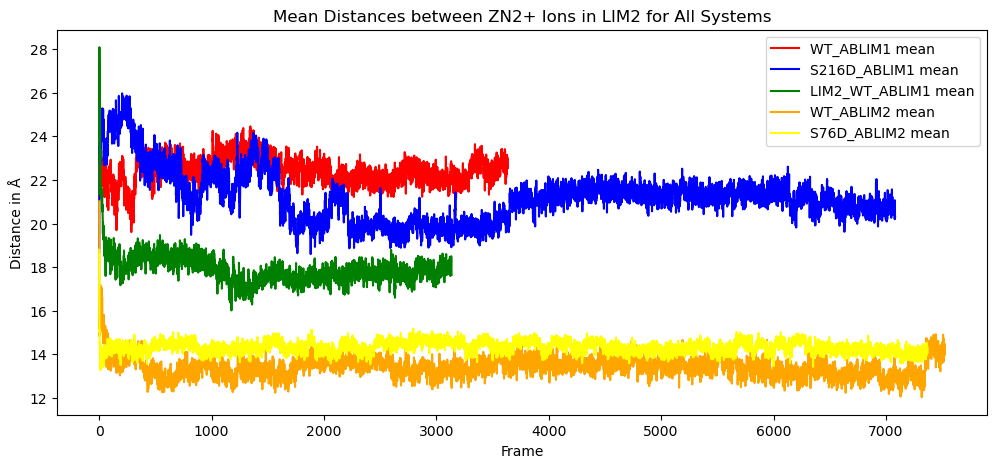

In [113]:
#MEAN DISTANCES BETWEEN ZINC IONS

systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['black','red','gray','blue','lightcoral']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        zn1=573
        zn2=574
        zns='@573 @574'
    elif system=='S216D_ABLIM1':
        zn1=578
        zn2=579
        zns=':252 :253'
    elif system=='LIM2_WT_ABLIM1':
        zn1=140
        zn2=141
        zns=':64 :65'
    else:
        zn1=179
        zn2=180
        zns=':82 :83'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    ZN_distances1=pt.distance(traj1, mask=zns)
    ZN_distances2=pt.distance(traj2, mask=zns)
    ZN_distances3=pt.distance(traj3, mask=zns)
    #print(ZN_distances1)


    multiple_lists = [ZN_distances1,ZN_distances2,ZN_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    #print(means)
    
    
    #x1=np.arange(0,len(ZN_distances1))
    #x2=np.arange(0,len(ZN_distances2))
    #x3=np.arange(0,len(ZN_distances3))
    x4=np.arange(0,len(means))
    #y1=np.array(ZN_distances1)
    #y2=np.array(ZN_distances2)
    #y3=np.array(ZN_distances3)
    y4=np.array(means)
    #ax=plt.gca()
    #ax.set_ylim(10.0,31.0)
    #ax.plot(x1,y1,linestyle='-',color='red',label='triplicate 1',zorder=1)
    #ax.plot(x2,y2,linestyle='-',color='blue',label='triplicate 2',zorder=2)
    #ax.plot(x3,y3,linestyle='-',color='green',label='triplicate 3',zorder=3)
    legend=system+ ' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Mean Distances between ZN2+ Ions in LIM2 for All Systems"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='mean_LIM2_ZN_distances.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

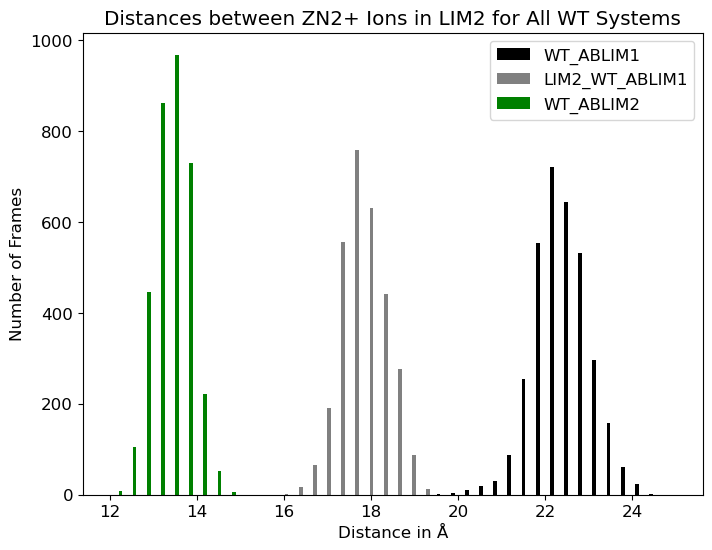

In [273]:
#HISTOGRAM OF DISTANCES BETWEEN ZINC IONS OF WT STRUCTURES

systems=['WT_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2']
color_num=0

n_bins = 40

fig, ax = plt.subplots()
x_multi=[]
colors = [ 'black','gray', 'green']
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        zn1=573
        zn2=574
        zns='@573 @574'
    elif system=='S216D_ABLIM1':
        zn1=578
        zn2=579
        zns=':252 :253'
    elif system=='LIM2_WT_ABLIM1':
        zn1=140
        zn2=141
        zns=':64 :65'
    else:
        zn1=179
        zn2=180
        zns=':82 :83'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    ZN_distances1=pt.distance(traj1, mask=zns)
    ZN_distances2=pt.distance(traj2, mask=zns)
    ZN_distances3=pt.distance(traj3, mask=zns)
    #print(ZN_distances1)


    multiple_lists = [ZN_distances1,ZN_distances2,ZN_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    #print(means)
    x_multi.append(means[100:3500])
    
    legend=system+ ' mean'

bin_counts,bin_edges,bars=ax.hist(x_multi, n_bins, histtype='bar',range=(12,25),color=colors,label=systems)


title="Distances between ZN2+ Ions in LIM2 for All WT Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
ax.figure.set_size_inches(8.0,6.0)
ax.legend()
#for b in bars:
#    ax.bar_label(b, labels=[v.astype(np.int64) if v > 0 else '' for v in b.datavalues])

name='WT_LIM2_ZN_Distances_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

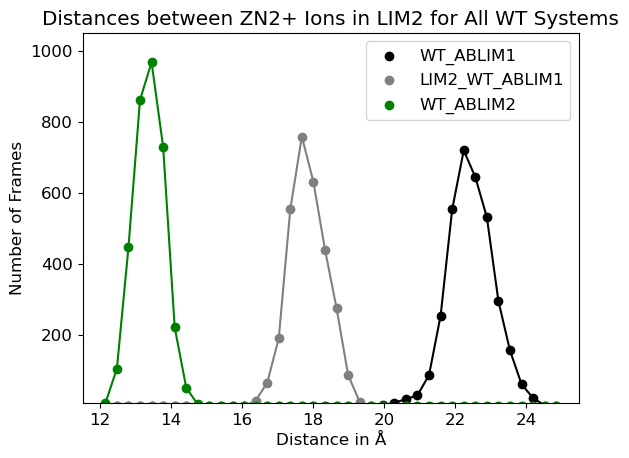

In [274]:
#ZN Distance Histogram w/out bars, just outline 
for i in range(len(bin_counts)):
    #get bin centers & convert them into scatterplot with lines connecting for each system
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(x=bin_centers,y=bin_counts[i],color=colors[i],label=systems[i])
    plt.plot(bin_centers,bin_counts[i],color=colors[i])

title="Distances between ZN2+ Ions in LIM2 for All WT Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
#ax.figure.set_size_inches(8.0,6.0)
plt.legend()
plt.ylim(10,1050)

name='WT_LIM2_ZN_Distances_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alecloftus/Analyses/WT_ABLIM1'

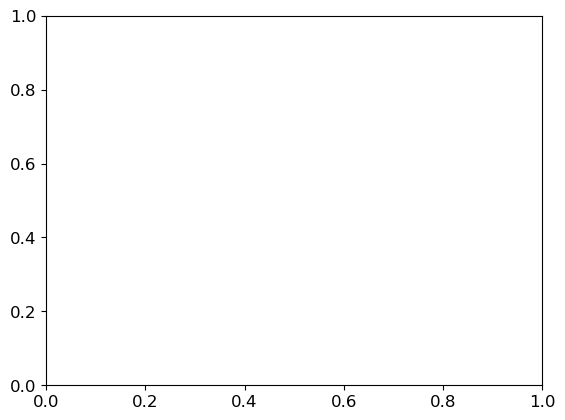

In [2]:
#HISTOGRAM OF DISTANCES BETWEEN ZINC IONS OF ABLIM1 STRUCTURES

systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1']
color_num=0

n_bins = 40

fig, ax = plt.subplots()
x_multi=[]
colors = ['black','red', 'gray']
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        zn1=573
        zn2=574
        zns='@573 @574'
    elif system=='S216D_ABLIM1':
        zn1=578
        zn2=579
        zns=':252 :253'
    elif system=='LIM2_WT_ABLIM1':
        zn1=140
        zn2=141
        zns=':64 :65'
    else:
        zn1=179
        zn2=180
        zns=':82 :83'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    ZN_distances1=pt.distance(traj1, mask=zns)
    ZN_distances2=pt.distance(traj2, mask=zns)
    ZN_distances3=pt.distance(traj3, mask=zns)
    #print(ZN_distances1)


    multiple_lists = [ZN_distances1,ZN_distances2,ZN_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    #print(means)
    x_multi.append(means[100:3500])
    
    legend=system+ ' mean'

#Find edges of histogram for each system

counts,edges,bars=ax.hist(x_multi, n_bins, histtype='bar',range=(12,25),color=colors,label=systems)
ax.set_title('different sample sizes')

title="Distances between ZN2+ Ions in LIM2 for All ABLIM1 Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
ax.figure.set_size_inches(8.0,6.0)
ax.legend()
#for b in bars:
#    ax.bar_label(b, labels=[v.astype(np.int64) if v > 0 else '' for v in b.datavalues])

name='ABLIM1_ZN_Distances_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

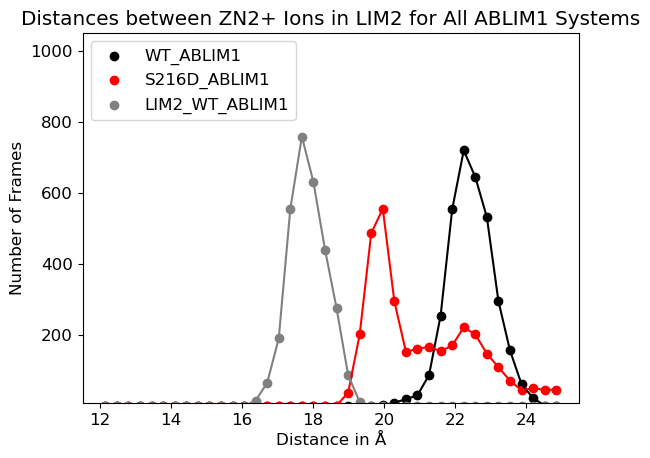

In [279]:
for i in range(len(counts)):
    bin_centres = (edges[:-1] + edges[1:])/2.
    plt.scatter(x=bin_centres,y=counts[i],color=colors[i],label=systems[i])
    plt.plot(bin_centres,counts[i],color=colors[i])

title="Distances between ZN2+ Ions in LIM2 for All ABLIM1 Systems"
plt.title(title)
plt.xlabel("Distance in Å")
plt.ylabel("Number of Frames")
#ax.figure.set_size_inches(8.0,6.0)
plt.legend(loc='upper left')
#for b in bars:
#    ax.bar_label(b, labels=[v.astype(np.int64) if v > 0 else '' for v in b.datavalues])
plt.ylim(10,1050)

name='ABLIM1_ZN_Distances_Hist.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

pytraj.TrajectoryIterator, 7560 frames: 
Size: 0.030416 (GB)
<Topology: 180 atoms, 83 residues, 180 mols, PBC with box type = cubic>
           
pytraj.TrajectoryIterator, 7370 frames: 
Size: 0.029652 (GB)
<Topology: 180 atoms, 83 residues, 180 mols, PBC with box type = cubic>
           
[16.89501584 16.47361491 16.73080252 ... 14.13937842 14.17649634
 14.05799742]
[16.67139963 15.84065795 14.88563268 ... 11.80531479 11.84541652
 11.79044505]


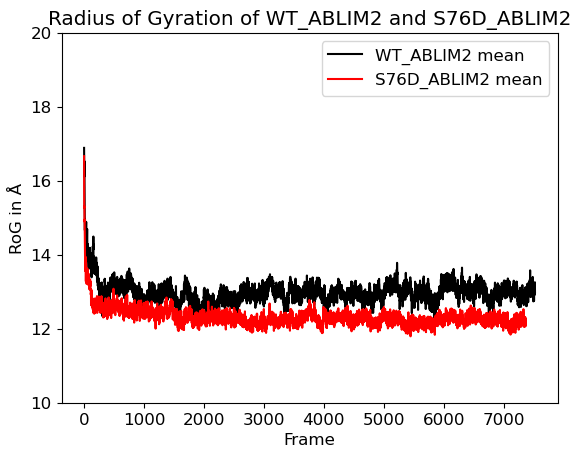

In [18]:
#WT_ABLIM2 & S76D_ABLIM2 Mean RoG


system1='WT_ABLIM2'
os.chdir(path/system1)

WT_traj1=pt.iterload(trajectory[0],topology[0])
WT_traj2=pt.iterload(trajectory[1],topology[1])
WT_traj3=pt.iterload(trajectory[2],topology[2])
print(WT_traj1)

system2='S76D_ABLIM2'
os.chdir(path/system2)
S76D_traj1=pt.iterload(trajectory[0],topology[0])
S76D_traj2=pt.iterload(trajectory[1],topology[1])
S76D_traj3=pt.iterload(trajectory[2],topology[2])
print(S76D_traj1)

os.chdir(path)

WT_data1=pt.radgyr(WT_traj1, mask='@BB')
WT_data2=pt.radgyr(WT_traj2, mask='@BB')
WT_data3=pt.radgyr(WT_traj3, mask='@BB')
print(WT_data1)

S76D_data1=pt.radgyr(S76D_traj1, mask='@BB')
S76D_data2=pt.radgyr(S76D_traj2, mask='@BB')
S76D_data3=pt.radgyr(S76D_traj3, mask='@BB')
print(S76D_data1)


WT_multiple_lists = [WT_data1,WT_data2,WT_data3]
WT_arrays = [np.array(x) for x in WT_multiple_lists]
WT_means=[np.mean(k) for k in zip(*WT_arrays)]
WT_sds=[np.std(k) for k in zip(*WT_arrays)]

S76D_multiple_lists = [S76D_data1,S76D_data2,S76D_data3]
S76D_arrays = [np.array(x) for x in S76D_multiple_lists]
S76D_means=[np.mean(k) for k in zip(*S76D_arrays)]
S76D_sds=[np.std(k) for k in zip(*S76D_arrays)]

fig,ax = plt.subplots()
#fig=plt.figure(figsize=(14,5))
#WTx1=np.arange(0,len(WT_data1))
#WTx2=np.arange(0,len(WT_data2))
#WTx3=np.arange(0,len(WT_data3))
WTx4=np.arange(0,len(WT_means))

#S76Dx1=np.arange(0,len(S76D_data1))
#S76Dx2=np.arange(0,len(S76D_data2))
#S76Dx3=np.arange(0,len(S76D_data3))
S76Dx4=np.arange(0,len(S76D_means))

#WTy1=np.array(WT_data1)
#WTy2=np.array(WT_data2)
#WTy3=np.array(WT_data3)
WTy4=np.array(WT_means)

#S76Dy1=np.array(S76D_data1)
#S76Dy2=np.array(S76D_data2)
#S76Dy3=np.array(S76D_data3)
S76Dy4=np.array(S76D_means)


ax=plt.gca()
ax.set_ylim(10.0,20.0)
#ax.plot(WTx1,WTy1,linestyle='-',color='red',label='WT triplicate 1')
#ax.plot(WTx2,WTy2,linestyle='-',color='indianred',label='WT triplicate 2')
#ax.plot(WTx3,WTy3,linestyle='-',color='lightcoral',label='WT triplicate 3')
ax.plot(WTx4,WTy4,linestyle='-',color='black',label='WT_ABLIM2 mean')
#ax.plot(S76Dx1,S76Dy1,linestyle='-',color='darkblue',label='S76D triplicate 1')
#ax.plot(S76Dx2,S76Dy2,linestyle='-',color='blue',label='S76D triplicate 2')
#ax.plot(S76Dx3,S76Dy3,linestyle='-',color='cornflowerblue',label='S76D triplicate 3')
ax.plot(S76Dx4,S76Dy4,linestyle='-',color='red',label='S76D_ABLIM2 mean')
title="Radius of Gyration of " + system1 + ' and ' + system2
leg=ax.legend()
plt.title(title)
plt.xlabel("Frame")
plt.ylabel("RoG in Å")
 
name=system1 + '_' + system2+'_ROG.png'
plt.gcf().savefig(name,dpi=300)
plt.show()

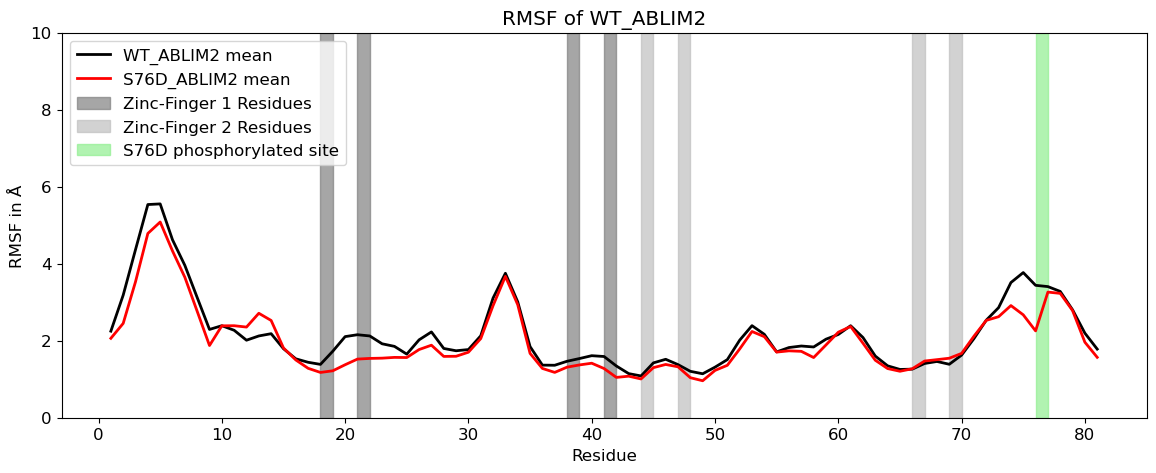

In [5]:
#OVERLAY WT_ABLIM2 & S76D_ABLIM2 RMSF

system1='WT_ABLIM2'
os.chdir(path/system1)

WT_traj1=pt.iterload(trajectory[0],topology[0])
WT_traj2=pt.iterload(trajectory[1],topology[1])
WT_traj3=pt.iterload(trajectory[2],topology[2])
#print(WT_traj1)

system2='S76D_ABLIM2'
os.chdir(path/system2)
S76D_traj1=pt.iterload(trajectory[0],topology[0])
S76D_traj2=pt.iterload(trajectory[1],topology[1])
S76D_traj3=pt.iterload(trajectory[2],topology[2])
#print(S76D_traj1)

os.chdir(path)

#Calculate RMSF for each replicate of each system
WT_traj1_imposed= pt.superpose(WT_traj1,ref=0)
WTrmsf_data1=pt.rmsf(WT_traj1_imposed,mask='@BB',options='byres')
#print(WTrmsf_data1.T[0])

WT_traj2_imposed= pt.superpose(WT_traj2,ref=0)
WTrmsf_data2=pt.rmsf(WT_traj2_imposed,mask='@BB',options='byres')
#print(WTrmsf_data2.T[0])

WT_traj3_imposed= pt.superpose(WT_traj3,ref=0)
WTrmsf_data3=pt.rmsf(WT_traj3_imposed,mask='@BB',options='byres')
#print(rmsf_data3)

S76D_traj1_imposed= pt.superpose(S76D_traj1,ref=0)
S76Drmsf_data1=pt.rmsf(S76D_traj1_imposed,mask='@BB',options='byres')
#print(S76Drmsf_data1)

S76D_traj2_imposed= pt.superpose(S76D_traj2,ref=0)
S76Drmsf_data2=pt.rmsf(S76D_traj2_imposed,mask='@BB',options='byres')
#print(rmsf_data2)

S76D_traj3_imposed= pt.superpose(S76D_traj3,ref=0)
S76Drmsf_data3=pt.rmsf(S76D_traj3_imposed,mask='@BB',options='byres')
#print(rmsf_data3)

#generate list of RMSFs, convert to arrays, and calculate mean of all arrays
WT_multiple_lists = [WTrmsf_data1.T[1],WTrmsf_data2.T[1],WTrmsf_data3.T[1]]
WT_arrays = [np.array(x) for x in WT_multiple_lists]
WT_means=[np.mean(k) for k in zip(*WT_arrays)]

#print(len(WT_means))
#print(WT_means)

 
S76D_multiple_lists = [S76Drmsf_data1.T[1],S76Drmsf_data2.T[1],S76Drmsf_data3.T[1]]
S76D_arrays = [np.array(x) for x in S76D_multiple_lists]
S76D_means=[np.mean(k) for k in zip(*S76D_arrays)]
#print(S76D_means)


fig=plt.figure(figsize=(14,5))
ax=plt.gca()
ax.set_ylim(0.0,10.0)
ax.plot(WTrmsf_data1.T[0],WT_means,linestyle='-',linewidth=2.0,color='black',label='WT_ABLIM2 mean')
ax.plot(S76Drmsf_data1.T[0],S76D_means,linestyle='-',linewidth=2.0,color='red',label='S76D_ABLIM2 mean')

#Add highlighted regions to figure for ZN finger 1
finger1_constraints=[18,21,38,41]
for constraint in finger1_constraints:
    res=constraint
    if res==18:
        plt.axvspan(res,res+1, color='gray',alpha=0.7,label='Zinc-Finger 1 Residues')
    else:
        plt.axvspan(res,res+1, color='gray',alpha=0.7)

#Add highlighted regions to figure for ZN finger 2
finger2_constraints=[44,47,66,69,76]
for constraint in finger2_constraints:
    res=constraint
    if res==44:
        plt.axvspan(res,res+1, color='silver',alpha=0.7,label='Zinc-Finger 2 Residues')
    elif res==76:
        #also highlight the phosphorylation site at the tail of ABLIM2 LIM2
        plt.axvspan(res,res+1, color='lightgreen',alpha=0.7,label='S76D phosphorylated site')
    else:
        plt.axvspan(res,res+1, color='silver',alpha=0.7)

title="RMSF of " + system1 + ' and ' + system2
leg=ax.legend()
plt.title(title)
plt.xlabel("Residue")
plt.ylabel("RMSF in Å")

os.chdir(path)
name=system1 + '_RMSF.png'
plt.gcf().savefig(name,dpi=300)
plt.show()

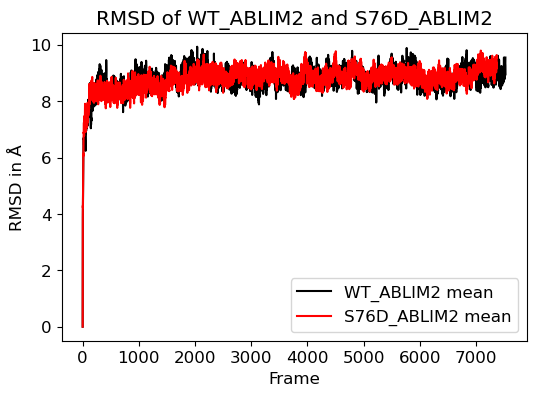

In [9]:
#Overlay of WT_ABLIM2 & S76D_ABLIM2 RMSD

system1='WT_ABLIM2'
system2='S76D_ABLIM2'

os.chdir(path/system1)
WT_data1=pt.rmsd(WT_traj1, mask='@BB')
WT_data2=pt.rmsd(WT_traj2, mask='@BB')
WT_data3=pt.rmsd(WT_traj3, mask='@BB')
#print(WT_data1)

os.chdir(path/system2)
S76D_data1=pt.rmsd(S76D_traj1, mask='@BB')
S76D_data2=pt.rmsd(S76D_traj2, mask='@BB')
S76D_data3=pt.rmsd(S76D_traj3, mask='@BB')
#print(S76D_data1)

os.chdir(path)
WT_multiple_lists = [WT_data1,WT_data2,WT_data3]
WT_arrays = [np.array(x) for x in WT_multiple_lists]
WT_means=[np.mean(k) for k in zip(*WT_arrays)]
WT_sds=[np.std(k) for k in zip(*WT_arrays)]

S76D_multiple_lists = [S76D_data1,S76D_data2,S76D_data3]
S76D_arrays = [np.array(x) for x in S76D_multiple_lists]
S76D_means=[np.mean(k) for k in zip(*S76D_arrays)]
S76D_sds=[np.std(k) for k in zip(*S76D_arrays)]


fig,ax = plt.subplots()
#fig=plt.figure(figsize=(14,5))
#WTx1=np.arange(0,len(WT_data1))
#WTx2=np.arange(0,len(WT_data2))
#WTx3=np.arange(0,len(WT_data3))
WTx4=np.arange(0,len(WT_means))

#S76Dx1=np.arange(0,len(S76D_data1))
#S76Dx2=np.arange(0,len(S76D_data2))
#S76Dx3=np.arange(0,len(S76D_data3))
S76Dx4=np.arange(0,len(S76D_means))

#WTy1=np.array(WT_data1)
#WTy2=np.array(WT_data2)
#WTy3=np.array(WT_data3)
WTy4=np.array(WT_means)

#S76Dy1=np.array(S76D_data1)
#S76Dy2=np.array(S76D_data2)
#S76Dy3=np.array(S76D_data3)
S76Dy4=np.array(S76D_means)


ax=plt.gca()
ax.plot(WTx4,WTy4,linestyle='-',color='black',label='WT_ABLIM2 mean')
ax.plot(S76Dx4,S76Dy4,linestyle='-',color='red',label='S76D_ABLIM2 mean')
title="RMSD of " + system1 + ' and ' + system2
leg=ax.legend()
plt.title(title)
plt.xlabel("Frame")
plt.ylabel("RMSD in Å")
ax.figure.set_size_inches(6.0,4.0)

os.chdir(path)
name=system1 + '_' + system2+'_RMSD.png'
plt.gcf().savefig(name,dpi=300)
plt.show()

In [ ]:
#LIM2 ZN Coordination
#--ServerApp.iopub_data_rate_limit=2000000

lim2_systems=['WT_ABLIM2','S76D_ABLIM2','LIM2_WT_ABLIM1']


list_of_pairs=[]
mean_distance_matrix=[]
sd_distance_matrix=[]


for system in lim2_systems:
    os.chdir(path/system)
    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    if system=='LIM2_WT_ABLIM1':
        constraints=LIM2_WT_ABLIM1_constraints
        zn1=140
        zn2=141
    else:
        constraints=ABLIM2_constraints
        zn1=179
        zn2=180

    for key, value in constraints.items():
        for i in range(0,4):
            #print(type(combo))
            zinc=key
            atom=value[i]
            pair=atom + ' ' + zinc
            list_of_pairs.append(system+ ' ' + atom[1:] + ' ' + zinc[1:])
            #print(pair)

            
            data1=pt.distance(traj1,pair)
            data2=pt.distance(traj2,pair)
            data3=pt.distance(traj3,pair)
            #list of all triplicate
            triple_list=[data1,data2,data3]
            tripl_arrays = [np.array(x) for x in triple_list]
            means=[np.mean(k) for k in zip(*tripl_arrays)]
            sds=[np.std(k) for k in zip(*tripl_arrays)]
            #print(means)
            mean_distance_matrix.append(means)
            sd_distance_matrix.append(sds)


final_mean_matrix=[]
final_sd_matrix=[]
list=[]
for i in range(len(list_of_pairs)):
    mean_list=[]
    sd_list=[]
    for j in range(len(mean_distance_matrix[0])):
        mean_list.append(mean_distance_matrix[i])
        sd_list.append(sd_distance_matrix[i])
        
    mean_arrays = [np.array(x) for x in mean_list]
    #print(mean_arrays)
    final_means=[np.mean(k) for k in zip(*mean_arrays)]
    final_mean_matrix.append(final_means)
    
    sd_arrays=[np.array(x) for x in sd_list]
    final_sds=[np.mean(k) for k in zip(*sd_arrays)]
    final_sd_matrix.append(final_sds)

print(len(list_of_pairs))
print(len(mean_distance_matrix[0]))
print(len(sd_distance_matrix[0]))

print(len(final_sds_matrix))
print(len(final_sds_matrix[0]))
#print(list_of_pairs)
#print(mean_distance_matrix)
#print(sd_distance_matrix)
'''
fig,ax=plt.subplots()
x=list_of_pairs
y=final_mean_matrix
e=final_sd_matrix
plt.title('Mean & SD Distances of each Residue-Ion pairing for Isolated LIM2 domains')
plt.xlabel('Residue-Ion Pairing')
plt.bar(x,y,yerr=e, align='center',alpha=0.5,color='red')
ax.figure.set_size_inches(6.0,3.0)
plt.savefig('LIM2_ResIon_Distances.png')
plt.show()
'''
#print(distance_matrix)

7525


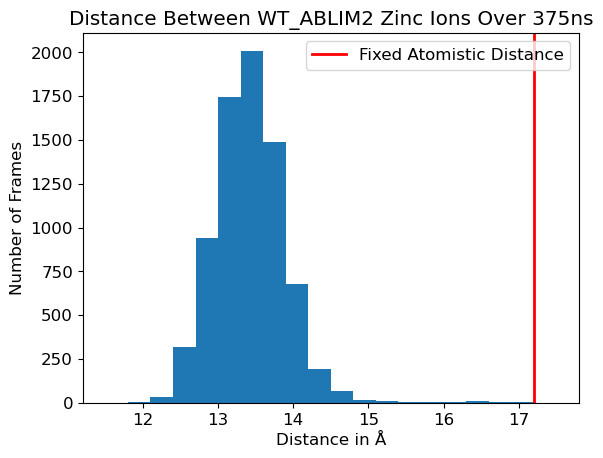

In [281]:
#CG WT_ABLIM2 vs atomistic WT_ABLIM2 distances

system1='WT_ABLIM2'


os.chdir(path/system1)
zn1=179
zn2=180
zns=':82 :83'

traj1=pt.iterload(trajectory[0],topology[0])
traj2=pt.iterload(trajectory[1],topology[1])
traj3=pt.iterload(trajectory[2],topology[2])
    
ZN_distances1=pt.distance(traj1, mask=zns)
ZN_distances2=pt.distance(traj2, mask=zns)
ZN_distances3=pt.distance(traj3, mask=zns)
#print(ZN_distances1)


multiple_lists = [ZN_distances1,ZN_distances2,ZN_distances3]
arrays = [np.array(x) for x in multiple_lists]
means=[np.mean(k) for k in zip(*arrays)]
sd=[np.std(k) for k in zip(*arrays)]

print(len(means))

count,edges,bars=plt.hist(means,bins=20,range=(11.5,17.5))
#plt.bar_label(bars)
plt.axvline(x=17.2, linewidth=2, label= 'Fixed Atomistic Distance',color='red')

# Add label
plt.legend(loc = 'upper right')


#atomistic_mean=[17.2]
#atomistic_sd=[0.0]


plt.title('Distance Between WT_ABLIM2 Zinc Ions Over 375ns')
plt.xlabel('Distance in Å')
plt.ylabel('Number of Frames')


os.chdir(path)
name='WT_ABLIM2_ZN_Hist.png'
plt.gcf().savefig(name,dpi=300)
plt.show()

In [1]:
#DISTANCE BETWEEN ZNS AND COORDINATING RESIDUES IN WT_ABLIM2
#unfinished cell as it was deemed not super relevant for CG simulation that was constrained

import statistics

system='WT_ABLIM2'


os.chdir(path/system)

ABLIM2_constraints={'@179':['@40','@48','@87','@93'],'@180':['@101','@106','@149','@156']}

traj1=pt.iterload(trajectory[0],topology[0])
traj2=pt.iterload(trajectory[1],topology[1])
traj3=pt.iterload(trajectory[2],topology[2])

os.chdir(path)

fingers=['Fixed Atomistic Finger 1','CG Zinc-Finger 1','CG Zinc-Finger 2']

constraints=ABLIM2_constraints

#print(constraints)

fixed_dist=(2.3,2.3,2.4,2.3)
finger1_means=[]
finger2_means=[]
e1=[]
e2=[]

for key, value in constraints.items():
    finger_means=[]
    if key=='@179':
        for i in range(0,4):
        #print(type(combo))
            zinc=key
            atom=value[i]
            pair=atom + ' ' + zinc
            #print(pair)
            distance1=pt.distance(traj1,pair)
            distance2=pt.distance(traj2,pair)
            distance3=pt.distance(traj3,pair)
            distances=[distance1,distance2,distance3]
            distance_arrays = [np.array(x) for x in distances]
            #print(mean_arrays)
            means=[np.mean(k) for k in zip(*distance_arrays)]
            true_mean=statistics.fmean(means)
            sds=[np.std(j) for j in zip(*distance_arrays)]
            e1.append(np.std(sds))
            print(true_mean)
            finger1_means.append(true_mean)
            #print(len(means))
            #print(type(means))
            
            #print(len(finger_means))
            #final_array=[np.array(j) for j in finger_means]
            #final_means=[np.mean(l) for l in zip(*final_array)]
            #finger1_means.append(final_means)
        #print(len(finger1_means))
        #print(finger1_means)
    else:
        for i in range(0,4):
        #print(type(combo))
            zinc=key
            atom=value[i]
            pair=atom + ' ' + zinc
            #print(pair)
            distance1=pt.distance(traj1,pair)
            distance2=pt.distance(traj2,pair)
            distance3=pt.distance(traj3,pair)
            distances=[distance1,distance2,distance3]
            distance_arrays = [np.array(x) for x in distances]
            #print(mean_arrays)
            means=[np.mean(k) for k in zip(*distance_arrays)]
            sds=[np.std(j) for j in zip(*distance_arrays)]
            e2.append(np.std(sds))
            true_mean=statistics.fmean(means)
            print(true_mean)
            finger2_means.append(true_mean)
            #final_array=[np.array(j) for j in finger_means]
            #final_means=[np.mean(l) for l in zip(*final_array)]
            #finger2_means.append(final_means)
        #print(len(finger2_means))
        #print(finger2_means)

#print(finger1_means)
#print(len(finger1_means))

N=4
# Specify the values of blue bars (height)
blue_bar = (2.1,2.8,2.9,3.1)
# Specify the values of orange bars (height)
orange_bar = (1.9, 2.8, 2.4,2.8)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.2       

# Plotting
plt.bar(ind, fixed_dist , width, label='Fixed Atomistic',color='blue')
plt.bar(ind + width, finger1_means, e1, width, label='Zinc Finger 1',color='darkorange')
plt.bar(ind + width + width, finger2_means, e2, width, label='Zinc Finger 2',color='green')
        
plt.xlabel('Residues Coordinating Zinc Finger')
plt.ylabel('Distance in Å')
plt.title('Average ZN to Residue Distances for Zinc-Finger Amino Acids in WT_ABLIM2')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('CYS18/CYS44','CYS21/CYS47','HIS38/CYS66','CYS41/CYS69'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
name='WT_ABLIM2_ZN_Fingers.png'
plt.gcf().savefig(name,dpi=300)
plt.show()



NameError: name 'os' is not defined

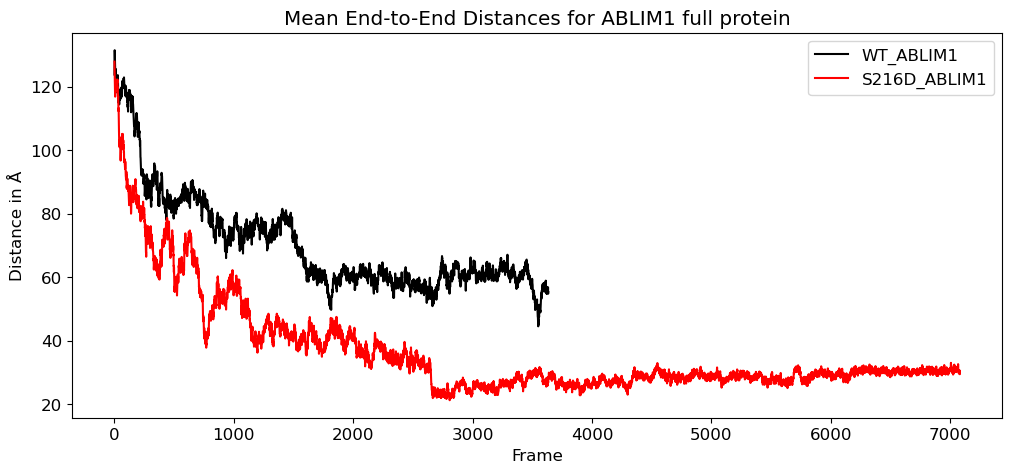

In [44]:
#MEAN LIM1 TO LIM4 END TO END DISTANCE FOR FULL ABLIM1

systems=['WT_ABLIM1','S216D_ABLIM1']#,'LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['black','red']#,'gray','green','lightcoral']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        ends='@1 @569'
    elif system=='S216D_ABLIM1':
        ends='@1 @573'
    elif system=='LIM2_WT_ABLIM1':
        ends='@1 @138'
    else:
        ends='@1 @178'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    end_distances1=pt.distance(traj1, mask=ends)
    end_distances2=pt.distance(traj2, mask=ends)
    end_distances3=pt.distance(traj3, mask=ends)
    #print(ZN_distances1)
    
    multiple_lists = [end_distances1,end_distances2,end_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    sd=[np.std(k) for k in zip(*arrays)]
    
    x4=np.arange(0,len(means))
    y4=np.array(means)
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=system,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Mean End-to-End Distances for ABLIM1 full protein"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='mean_end_to_end_distances.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

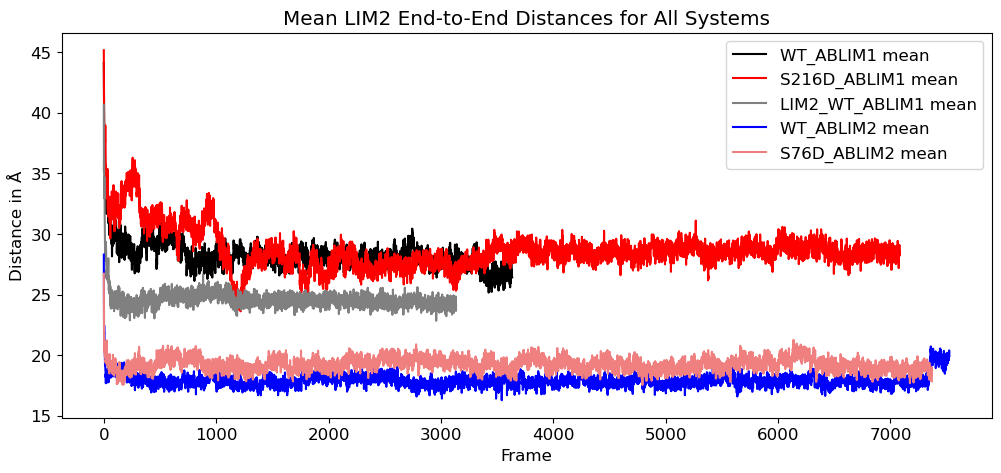

In [42]:
#MEAN END TO END DISTANCE OF LIM2 FOR ALL SYSTEMS

systems=['WT_ABLIM1','S216D_ABLIM1','LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['black','red','gray','blue','lightcoral']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        ends='@144 @280'
    elif system=='S216D_ABLIM1':
        ends='@144 @280'
    elif system=='LIM2_WT_ABLIM1':
        ends='@1 @138'
    else:
        ends='@34 @178'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    end_distances1=pt.distance(traj1, mask=ends)
    end_distances2=pt.distance(traj2, mask=ends)
    end_distances3=pt.distance(traj3, mask=ends)
    #print(ZN_distances1)
    
    multiple_lists = [end_distances1,end_distances2,end_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    sd=[np.std(k) for k in zip(*arrays)]
    
    x4=np.arange(0,len(means))
    #y1=np.array(ZN_distances1)
    #y2=np.array(ZN_distances2)
    #y3=np.array(ZN_distances3)
    y4=np.array(means)
    #ax=plt.gca()
    #ax.set_ylim(10.0,31.0)
    #ax.plot(x1,y1,linestyle='-',color='red',label='triplicate 1',zorder=1)
    #ax.plot(x2,y2,linestyle='-',color='blue',label='triplicate 2',zorder=2)
    #ax.plot(x3,y3,linestyle='-',color='green',label='triplicate 3',zorder=3)
    legend=system+ ' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Mean LIM2 End-to-End Distances for All Systems"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='mean_LIM2_end_to_end_distances.png'
os.chdir(path/)
plt.gcf().savefig(name,dpi=300)
plt.show()

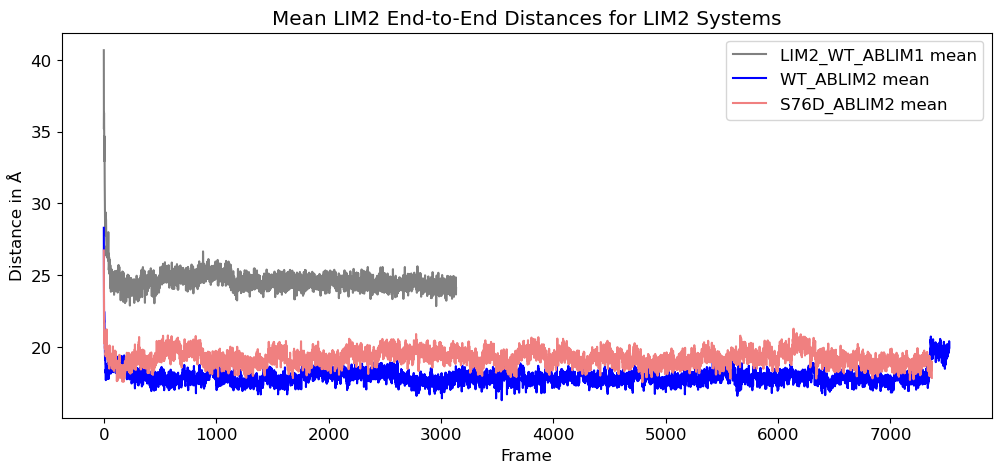

In [41]:
#END TO END DISTANCE OF LIM2 FOR ONLY LIM2 SYSTEMS

systems=['LIM2_WT_ABLIM1','WT_ABLIM2','S76D_ABLIM2']
color_num=0
colors=['gray','blue','lightcoral']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        ends='@144 @280'
    elif system=='S216D_ABLIM1':
        ends='@144 @280'
    elif system=='LIM2_WT_ABLIM1':
        ends='@1 @138'
    else:
        ends='@34 @178'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    end_distances1=pt.distance(traj1, mask=ends)
    end_distances2=pt.distance(traj2, mask=ends)
    end_distances3=pt.distance(traj3, mask=ends)
    #print(ZN_distances1)
    
    multiple_lists = [end_distances1,end_distances2,end_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    sd=[np.std(k) for k in zip(*arrays)]
    
    x4=np.arange(0,len(means))
    #y1=np.array(ZN_distances1)
    #y2=np.array(ZN_distances2)
    #y3=np.array(ZN_distances3)
    y4=np.array(means)
    #ax=plt.gca()
    #ax.set_ylim(10.0,31.0)
    #ax.plot(x1,y1,linestyle='-',color='red',label='triplicate 1',zorder=1)
    #ax.plot(x2,y2,linestyle='-',color='blue',label='triplicate 2',zorder=2)
    #ax.plot(x3,y3,linestyle='-',color='green',label='triplicate 3',zorder=3)
    legend=system+ ' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Mean LIM2 End-to-End Distances for LIM2 Systems"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='mean_LIM2_only_end_to_end_distances.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

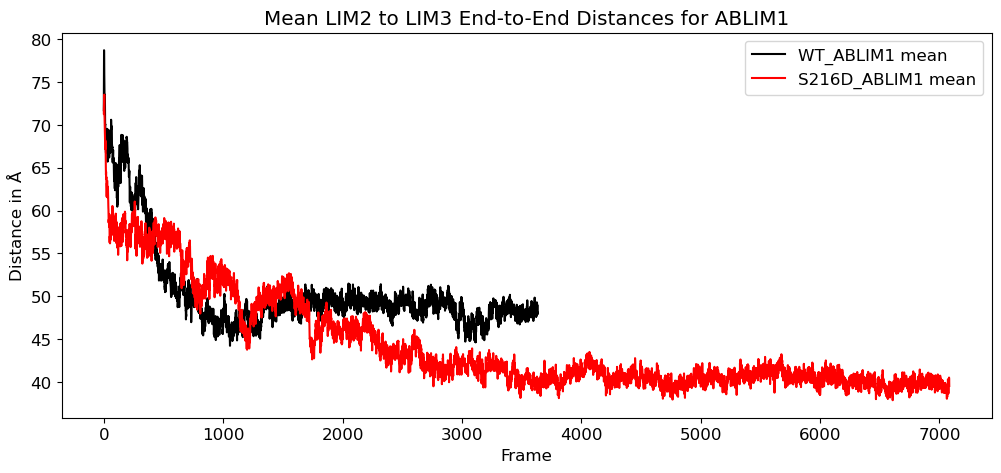

In [40]:
#END TO END DISTANCE OF LIM2 TO LIM3 FOR ABLIM1 SYSTEMS

systems=['WT_ABLIM1','S216D_ABLIM1']
color_num=0
colors=['black','red']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        ends='@144 @427'
    elif system=='S216D_ABLIM1':
        ends='@144 @427'
    elif system=='LIM2_WT_ABLIM1':
        ends='@1 @138'
    else:
        ends='@34 @178'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    end_distances1=pt.distance(traj1, mask=ends)
    end_distances2=pt.distance(traj2, mask=ends)
    end_distances3=pt.distance(traj3, mask=ends)
    #print(ZN_distances1)
    
    multiple_lists = [end_distances1,end_distances2,end_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    sd=[np.std(k) for k in zip(*arrays)]
    
    x4=np.arange(0,len(means))
    #y1=np.array(ZN_distances1)
    #y2=np.array(ZN_distances2)
    #y3=np.array(ZN_distances3)
    y4=np.array(means)
    #ax=plt.gca()
    #ax.set_ylim(10.0,31.0)
    #ax.plot(x1,y1,linestyle='-',color='red',label='triplicate 1',zorder=1)
    #ax.plot(x2,y2,linestyle='-',color='blue',label='triplicate 2',zorder=2)
    #ax.plot(x3,y3,linestyle='-',color='green',label='triplicate 3',zorder=3)
    legend=system+ ' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Mean LIM2 to LIM3 End-to-End Distances for ABLIM1"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='mean_LIM2_LIM3_end_to_end_distances.png'
os.chdir(path)
plt.gcf().savefig(name,dpi=300)
plt.show()

[71.72733072 78.03326877 78.94105215 ... 32.40718702 31.80520456
 32.60715628]
3635


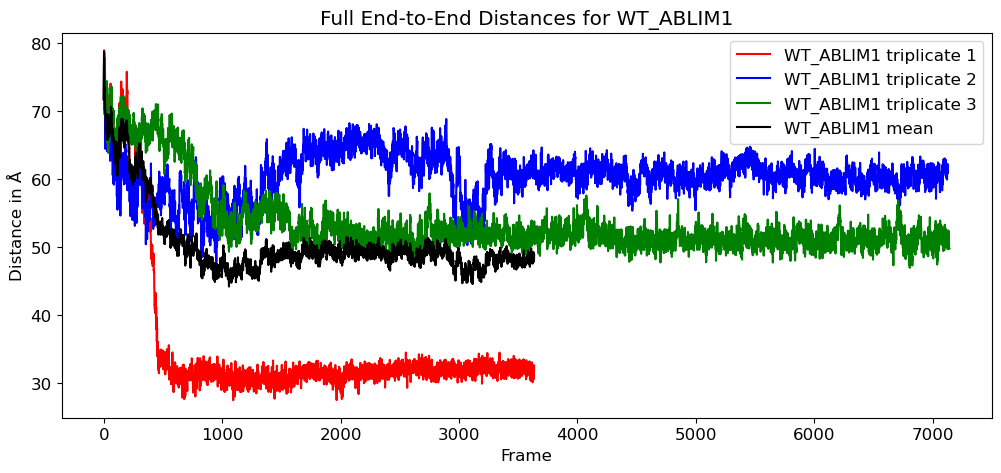

In [39]:
#END TO END DISTANCE OF LIM2 TO LIM3 FOR WT_ABLIM1

systems=['WT_ABLIM1']
color_num=0
colors=['black','red']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        ends='@144 @427'
    elif system=='S216D_ABLIM1':
        ends='@144 @427'
    elif system=='LIM2_WT_ABLIM1':
        ends='@1 @138'
    else:
        ends='@34 @178'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    end_distances1=pt.distance(traj1, mask=ends)
    end_distances2=pt.distance(traj2, mask=ends)
    end_distances3=pt.distance(traj3, mask=ends)
    print(end_distances1)
    print(len(end_distances1))
    
    multiple_lists = [end_distances1,end_distances2,end_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    sd=[np.std(k) for k in zip(*arrays)]

    x1=np.arange(len(end_distances1))
    x2=np.arange(len(end_distances2))
    x3=np.arange(len(end_distances3))
    x4=np.arange(0,len(means[0:4500]))
    
    y1=np.array(end_distances1)
    y2=np.array(end_distances2)
    y3=np.array(end_distances3)
    y4=np.array(means[0:4500])
    #ax=plt.gca()
    #ax.set_ylim(10.0,31.0)
    ax.plot(x1,y1,linestyle='-',color='red',label=system+' triplicate 1',zorder=1)
    ax.plot(x2,y2,linestyle='-',color='blue',label=system+' triplicate 2',zorder=2)
    ax.plot(x3,y3,linestyle='-',color='green',label=system+' triplicate 3',zorder=3)
    legend=system+ ' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Full End-to-End Distances for WT_ABLIM1"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='WT_ABLIM1_end_to_end_distances.png'
os.chdir(path)
#plt.gcf().savefig(name,dpi=300)
plt.show()

[127.95984487 126.40505715 121.45041462 ...  26.39428306  26.66520686
  26.02605543]
7136


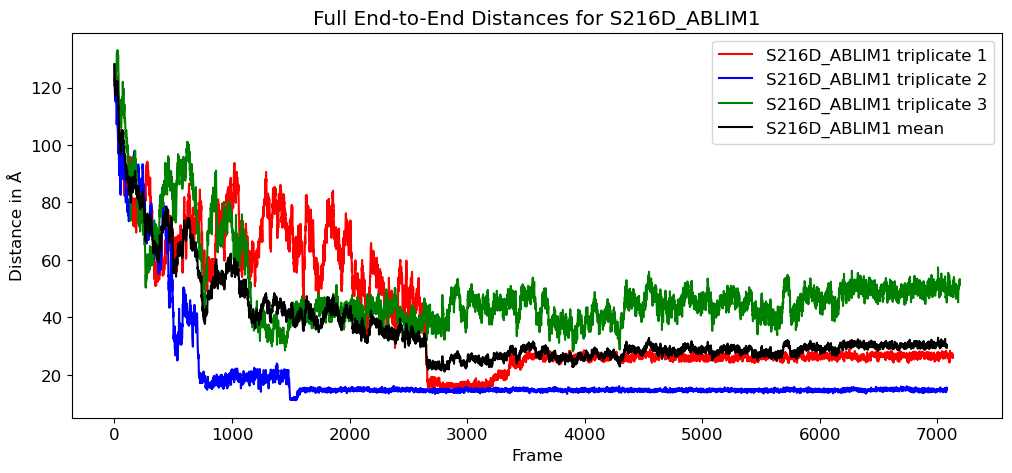

In [38]:
#END TO END DISTANCE OF LIM2 TO LIM3 FOR ABLIM1 SYSTEMS

systems=['S216D_ABLIM1']
color_num=0
colors=['black','red']

fig,ax=plt.subplots()
#fig=plt.figure(figsize=(14,5))

for system in systems:
    os.chdir(path/system)
    if system=='WT_ABLIM1':
        ends='@1 @569'
    elif system=='S216D_ABLIM1':
        ends='@1 @573'
    elif system=='LIM2_WT_ABLIM1':
        ends='@1 @138'
    else:
        ends='@1 @178'

    traj1=pt.iterload(trajectory[0],topology[0])
    traj2=pt.iterload(trajectory[1],topology[1])
    traj3=pt.iterload(trajectory[2],topology[2])
    
    end_distances1=pt.distance(traj1, mask=ends)
    end_distances2=pt.distance(traj2, mask=ends)
    end_distances3=pt.distance(traj3, mask=ends)
    print(end_distances1)
    print(len(end_distances1))
    
    multiple_lists = [end_distances1,end_distances2,end_distances3]
    arrays = [np.array(x) for x in multiple_lists]
    means=[np.mean(k) for k in zip(*arrays)]
    sd=[np.std(k) for k in zip(*arrays)]

    x1=np.arange(len(end_distances1))
    x2=np.arange(len(end_distances2))
    x3=np.arange(len(end_distances3))
    x4=np.arange(0,len(means))
    
    y1=np.array(end_distances1)
    y2=np.array(end_distances2)
    y3=np.array(end_distances3)
    y4=np.array(means)
    #ax=plt.gca()
    #ax.set_ylim(10.0,31.0)
    ax.plot(x1,y1,linestyle='-',color='red',label=system+' triplicate 1',zorder=1)
    ax.plot(x2,y2,linestyle='-',color='blue',label=system+' triplicate 2',zorder=2)
    ax.plot(x3,y3,linestyle='-',color='green',label=system+' triplicate 3',zorder=3)
    legend=system+ ' mean'
    ax.plot(x4,y4,linestyle='-',color=colors[color_num],label=legend,zorder=4)
    color_num+=1
    leg = ax.legend()
    title="Full End-to-End Distances for S216D_ABLIM1"
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Distance in Å")
    ax.figure.set_size_inches(12.0,5.0)

name='S216D_ABLIM1_end_to_end_distances.png'
os.chdir(path)
#plt.gcf().savefig(name,dpi=300)
plt.show()